<div align="center">
  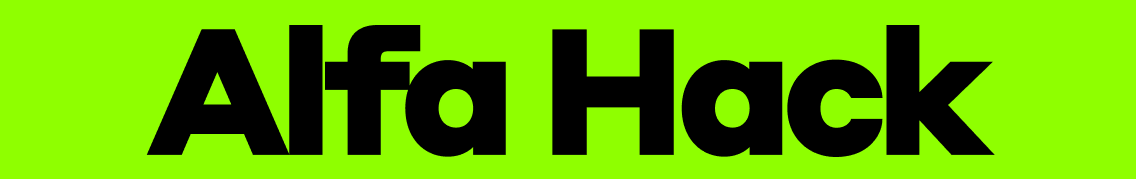
</div>

## Этап 1. Установка библиотек и импорт данных

In [4]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt

Подключаемся в Google Drive, чтобы работать с файлами из Google Colaboratory

Указываем путь к корневым папкам с данными test и train

__Обратите внимание:__ если вы создали папку с названием отличным от _"Хакатон Альфа-банка. Кейс 1"_, то необходимо поменять путь к директории и ссылки ниже

In [7]:
# Путь к папке с тренировочными данными
path_train = 'train'
# Путь к папке с тестовыми данными
path_test = 'test'

Получим список файлов в каждой из папок с данными

In [9]:
print(*[f'Список файлов в репозитории {x.split("/")[-1]}: {sorted(os.listdir(x), key=lambda x: len(x))}' for x in [path_train, path_test]], sep='\n')

Список файлов в репозитории train: ['train_2.csv', 'train_1.csv', 'train_7.csv', 'train_6.csv', 'train_8.csv', 'train_9.csv', 'train_4.csv', 'train_3.csv', 'train_5.csv', 'train_10.csv']
Список файлов в репозитории test: ['test_7.csv', 'test_8.csv', 'test_1.csv', 'test_3.csv', 'test_5.csv', 'test_2.csv', 'test_4.csv', 'test_9.csv', 'test_6.csv', 'test_10.csv']


Объединим тренировочные и тестовые данные в единые датасеты train и test

In [11]:
# Получим список путей к файлам в папке train
filenames_train = glob.glob(path_train + "/*.csv")

# Создадим список для записи считанных файлов train
data_files_train = []

# Считаем все файлы train и добавим их в список
for filename in filenames_train:
    data_files_train.append(pd.read_csv(filename))

# Объединим тренировочные данные в единый датасет
data_train = pd.concat(data_files_train, ignore_index=True)

# Выведем информацию о размерности полученных тренировочных данных
display('Размерность полных тренировочных данных составляет: {} строка и {} столбец'.format(*data_train.shape))

# Выведем первые 5 строк тренировочных данных
display(data_train.head())

# Удостоверимся, что перед нами данные только из выборки train
data_train['smpl'].value_counts(dropna=False)

'Размерность полных тренировочных данных составляет: 38731 строка и 421 столбец'

,target,smpl,id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_409,feature_410,feature_411,feature_412,feature_413,feature_414,feature_415,feature_416,feature_417,feature_418
0,0,train,3873,0.781053,-2.822431,1.0,-1.297398,-1.616318,-2.682773,-0.780434,...,-1.785225,-0.640910,0.0,-1.112226,-1.306706,-2.016204,-0.215154,-1.161018,-0.431538,0.886027
1,0,train,3874,-1.610554,-0.004187,1.0,-0.926986,-1.192641,-1.309490,-0.733063,...,-0.372753,-0.583215,0.0,0.931891,0.146103,-0.658290,-0.025485,0.210154,1.099961,-0.918443
2,0,train,3875,0.606618,-1.456822,0.0,0.780166,0.095048,-0.870786,-0.226350,...,0.165016,-0.449925,0.0,0.756962,-0.020179,0.518931,0.779199,0.936643,0.410800,-0.109610
3,0,train,3876,0.249014,-0.211661,0.0,0.929687,0.237440,-0.436239,-0.287175,...,0.237139,-0.339358,0.0,1.041432,-0.951589,0.595080,0.854666,1.137475,0.102690,0.182214
4,0,train,3877,0.169037,1.480832,0.0,-1.955879,-0.372808,-0.536662,-0.509941,...,0.825796,0.179982,0.0,-0.799940,-0.230657,-0.140730,0.268074,0.279254,1.317823,-0.020250


smpl
train    38731
Name: count, dtype: int64

In [12]:
# Получим список путей к файлам в папке test
filenames_test = glob.glob(path_test + "/*.csv")

# Создадим список для записи считанных файлов test
data_files_test = []

# Считаем все файлы test и добавим их в список
for filename in filenames_test:
    data_files_test.append(pd.read_csv(filename))

# Объединим тестовые данные в единый датасет
data_test = pd.concat(data_files_test, ignore_index=True)

# Выведем информацию о размерности полученных тестовых данных
display('Размерность полных тренировочных данных составляет: {} строк и {} столбцов'.format(*data_test.shape))

# Выведем первые 5 строк тренировочных данных
display(data_test.head())

# Удостоверимся, что перед нами данные только из выборки test
data_test['smpl'].value_counts(dropna=False)

'Размерность полных тренировочных данных составляет: 19826 строк и 420 столбцов'

,smpl,id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_409,feature_410,feature_411,feature_412,feature_413,feature_414,feature_415,feature_416,feature_417,feature_418
0,test,50623,0.780327,0.361062,0.0,2.764103,1.616489,0.736463,-0.148703,0.168592,...,1.002889,1.226367,0.0,-0.355301,-0.389552,0.483876,1.027128,-0.343962,0.810925,-0.010408
1,test,50624,-0.587051,-0.137204,0.0,2.695496,0.374829,2.048571,0.629798,-0.780549,...,0.720086,2.457638,0.0,0.494982,-1.717253,1.833921,0.415229,-0.574724,-0.379890,2.789302
2,test,50625,0.192754,-0.578836,1.0,-1.189066,-1.576909,-0.296280,-2.094318,-2.631222,...,0.890929,1.236550,0.0,0.563260,0.095650,-0.650888,-2.222571,-0.879643,-0.563460,-0.375700
3,test,50626,-0.301319,1.561578,1.0,-0.944339,-0.246081,-1.561737,-0.590160,0.568363,...,1.064058,-1.069191,0.0,0.323740,0.586764,-1.718601,-0.404290,-1.469953,-0.077410,0.162986
4,test,50627,-0.641267,-1.451793,0.0,-0.502273,0.130692,0.750171,0.958844,1.394341,...,0.188559,2.907857,0.0,-0.119988,-0.823482,0.593041,-0.081597,0.397399,1.122533,2.316853


smpl
test    19826
Name: count, dtype: int64

## Этап 2. Работа с моделью

In [14]:

X = data_train.drop(['target', 'smpl'], axis=1)
y = data_train['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size=0.3)

gbdt_clf = HistGradientBoostingClassifier(min_samples_leaf=1,
                                          max_depth=20,
                                          max_iter=125,
                                          random_state=42).fit(X_train, y_train)

y_pred = gbdt_clf.predict_proba(X_test)

y_pred = pd.Series(y_pred[:, 1])

print(f'Метрика roc-auc на валидационных данных имеет значение: {roc_auc_score(y_test, y_pred)}')

Метрика roc-auc на валидационных данных имеет значение: 0.7283334567750555


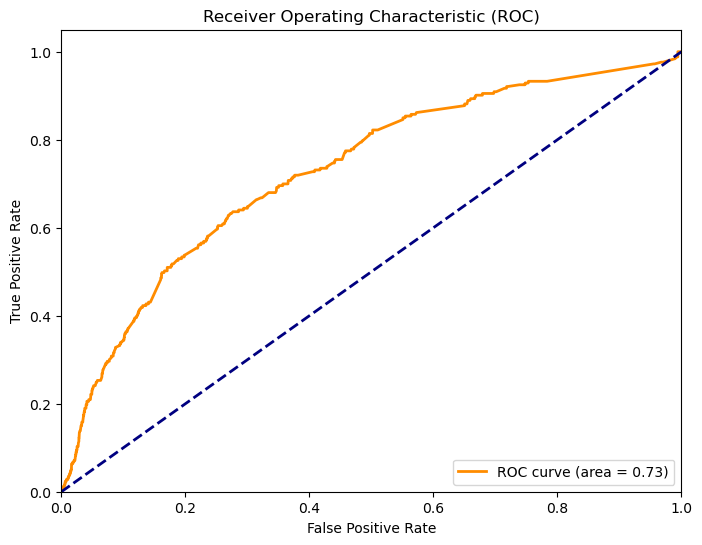

[       inf 0.99816539 0.92803877 ... 0.01078671 0.01078063 0.01044173]


In [15]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line representing random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
print(thresholds)

## Этап 3. Предсказание для тестовых данных



Получим предсказание на тестовых данных

In [18]:
gbdt_clf = HistGradientBoostingClassifier(min_samples_leaf=1,
                                          max_depth=20,
                                          max_iter=125,
                                          random_state=42).fit(X, y)

y_test_pred = gbdt_clf.predict_proba(data_test.drop(['smpl'], axis=1))

y_test_pred = pd.Series(y_test_pred[:, 1])

data_test['target'] = y_test_pred

data_test[['id', 'target']].to_csv('baseline_submission_case1.csv', index=False)

Baseline создан компанией Changellenge >> - ведущей организацией по кейсам в России, для хакатона Alfa Hack.  

Запрещено распространение данного файла, файлов данных в форматах csv, а также текста кейса без письменного разрешения владельца авторских прав в лице компании Changellenge>>.